# Import Dataset

In [5]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
air_quality = fetch_ucirepo(id=360) 
  
# data (as pandas dataframes) 
X = air_quality.data.features 
y = air_quality.data.targets 
  
# metadata 
print(air_quality.metadata) 
  
# variable information 
print(air_quality.variables) 

{'uci_id': 360, 'name': 'Air Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/360/air+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/360/data.csv', 'abstract': 'Contains the responses of a gas multisensor device deployed on the field in an Italian city. Hourly responses averages are recorded along with gas concentrations references from a certified analyzer. ', 'area': 'Computer Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 9358, 'num_features': 15, 'feature_types': ['Real'], 'demographics': [], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C59K5F', 'creators': ['Saverio Vito'], 'intro_paper': {'ID': 420, 'type': 'NATIVE', 'title': 'On field calibration of an electronic nose for benzene estimation in an urban pollution monitoring scenario', 'authors': 

# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

Dataset Shape: (9357, 15)

Missing Values:
 Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

Summary Statistics:
             CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  9357.000000  9357.000000  9357.000000  9357.000000    9357.000000   
mean    -34.207524  1048.990061  -159.090093     1.865683     894.595276   
std      77.657170   329.832710   139.789093    41.380206     342.333252   
min    -200.000000  -200.000000  -200.000000  -200.000000    -200.000000   
25%       0.600000   921.000000  -200.000000     4.000000     711.000000   
50%       1.500000  1053.000000  -200.000000     7.900000     895.000000   
75%       2.600000  1221.000000  -200.000000    13.600000    1105.000000   
max      11.900000  2040.000

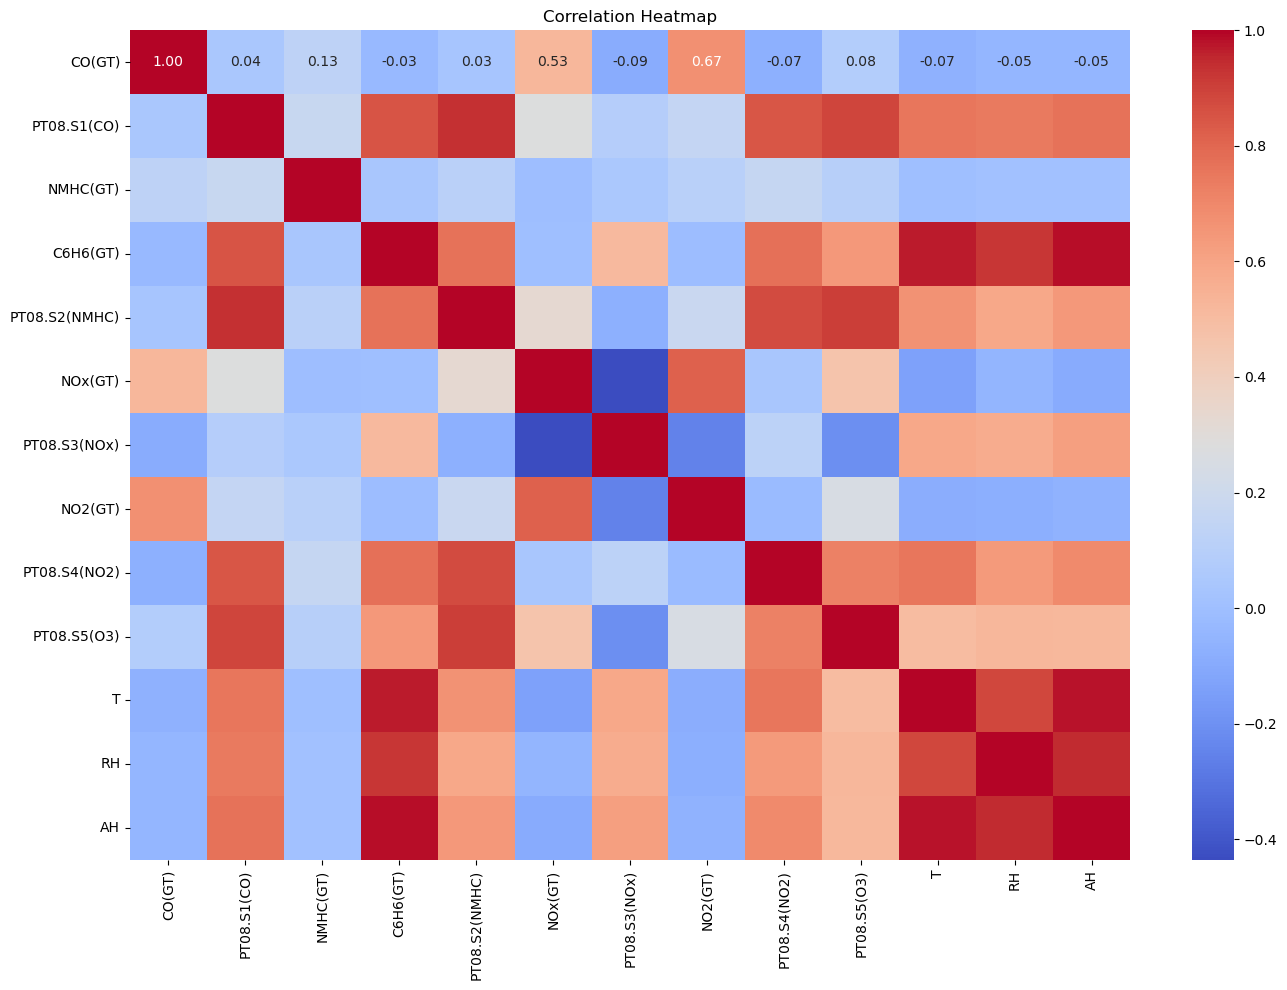

c:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


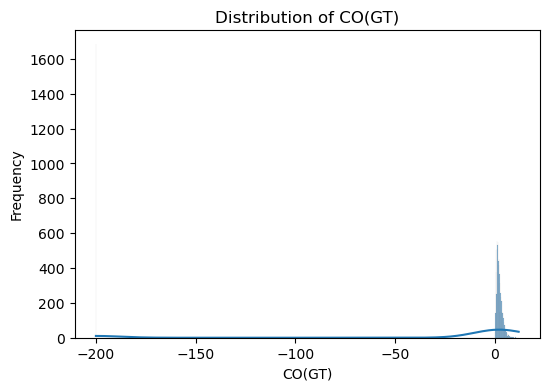

c:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


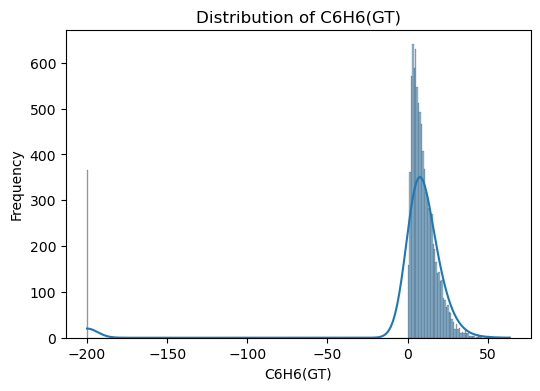

c:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


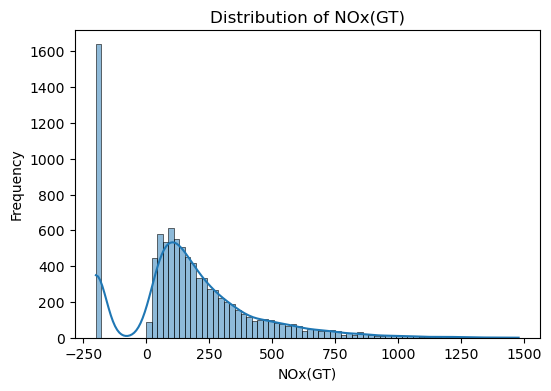

c:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


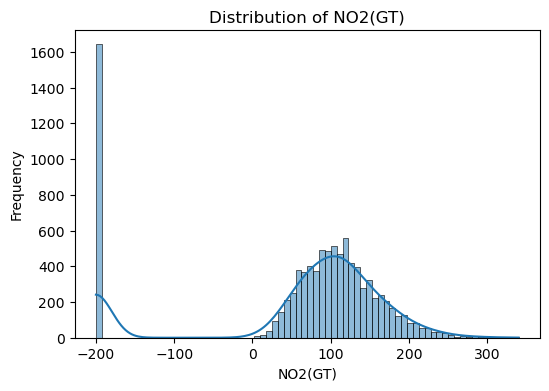

c:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


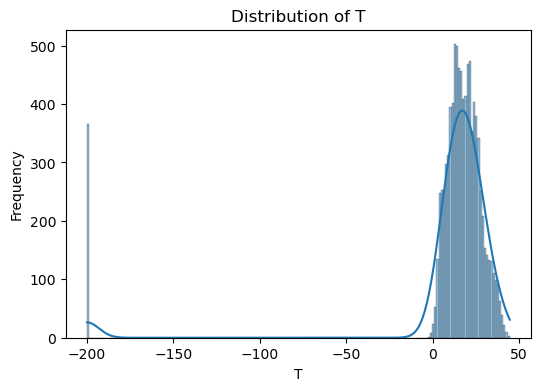

c:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


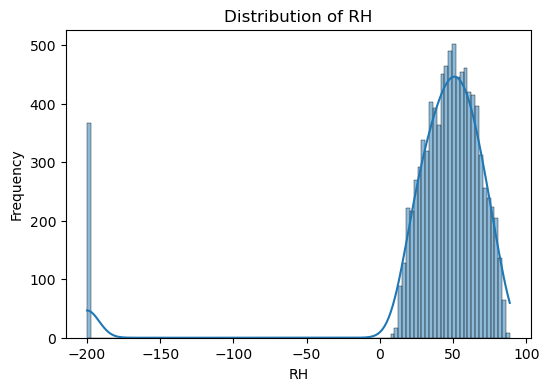

c:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


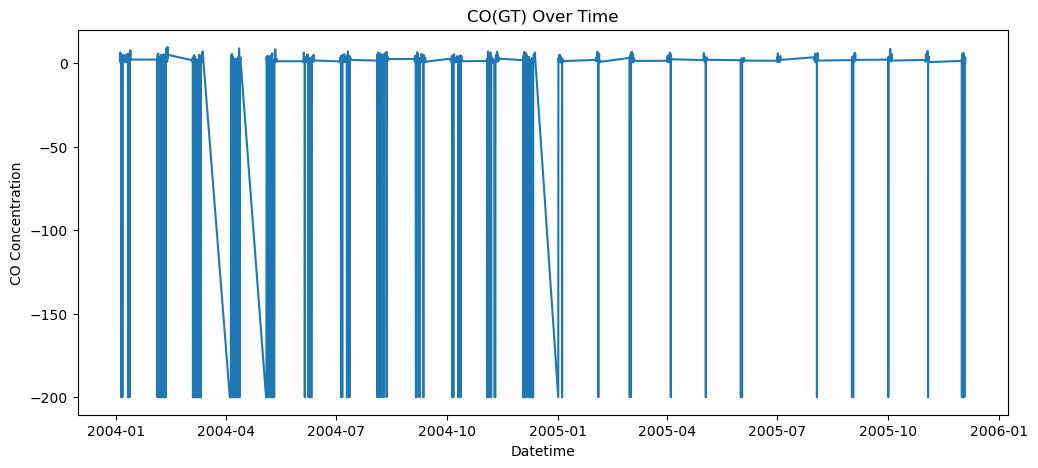

In [12]:
df = pd.concat([X, y], axis=1)

print("Dataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nSummary Statistics:\n", df.describe())

plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

key_cols = ['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)', 'T', 'RH']
for col in key_cols:
    if col in df.columns:
        plt.figure(figsize=(6, 4))
        sns.histplot(df[col].dropna(), kde=True)
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.show()


df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True, errors='coerce')
plt.figure(figsize=(12, 5))
sns.lineplot(x='Datetime', y='CO(GT)', data=df)
plt.title("CO(GT) Over Time")
plt.xlabel("Datetime")
plt.ylabel("CO Concentration")
plt.show()

# Hypothesis
### H₀: There is no correlation between ambient temperature (T) and CO concentration (CO(GT)) in the dataset.

### H₁: There is a positive correlation between ambient temperature (T) and CO concentration (CO(GT)).


Pearson correlation coefficient: -0.06893889806673664
P-value: 2.4618774452328707e-11


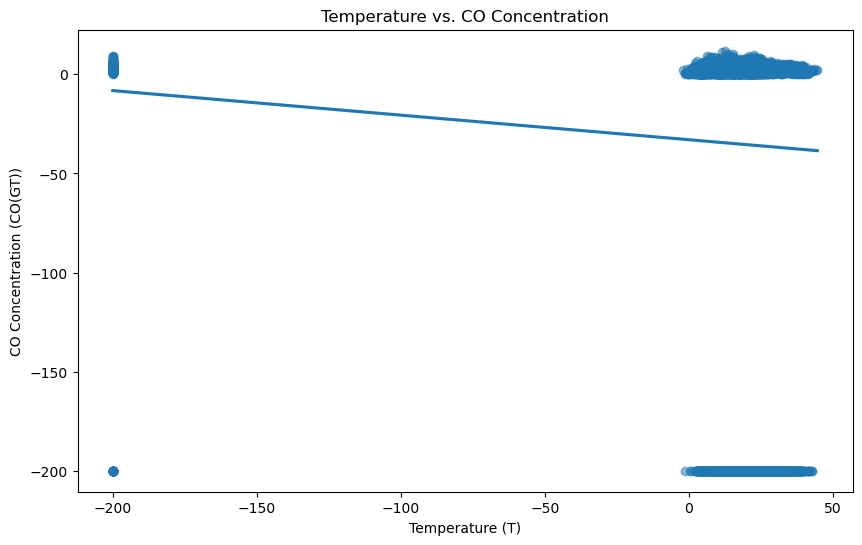

In [16]:
from scipy import stats

df_clean = df[['T', 'CO(GT)']].dropna()

corr_coef, p_value = stats.pearsonr(df_clean['T'], df_clean['CO(GT)'])
print("\nPearson correlation coefficient:", corr_coef)
print("P-value:", p_value)
alpha = 0.05

plt.figure(figsize=(10, 6))
sns.regplot(x='T', y='CO(GT)', data=df_clean, ci=None, scatter_kws={'alpha':0.5})
plt.title("Temperature vs. CO Concentration")
plt.xlabel("Temperature (T)")
plt.ylabel("CO Concentration (CO(GT))")
plt.show()

### Since the p-value is less than alpha (0.00 < 0.05), therefore I reject the null hypothesis thus there exists significant positive correlation between temperature and CO concentration. 

# Reporting and documentation

Exploratory Analysis and Hypothesis Testing Report

Data acquisition and cleansing

I retrieved the air quality dataset from the ucimlrepo package and received the data as two parts consisting of features (X) and targets (y), and they were merged together as one DataFrame for uniform analysis. In the process, I encountered various issues of data quality:

• A few columns (e.g., "Unnamed: 15" and "Unnamed: 16") were all empty and were removed. • There were numerous entries within the dataset with a value of -200. In line with the documentation of the dataset, these -200 values are due to faulty sensor readings and are considered to be missing data (NaN). The raw data had separate columns of Dates and Times, however these can be combined together as one datetime column should there be requirements to perform time series analysis.

Formulating Hypo

Our research question was whether or not there is any relation between ambient temperature (T) and carbon monoxide concentration (CO(GT)) within the dataset.

The hypotheses were established as follows: • Null Hypothesis (H₀): There is no correlation between temperature and CO concentration (the Pearson correlation coefficient, ρ, is 0). • Alternative Hypothesis (H₁): There is positive correlation between temperature and CO concentration (ρ > 0).

It is assumed in the alternative hypothesis that temperature may enable chemical reactions or be indicative of conditions that result in rising CO levels.

Hypothesis testing methodology

I used the Pearson correlation test to determine the degree of the linear relationship between temperature and CO concentration. The major steps were: • Pull the corresponding columns (T and CO(GT)) from the merged DataFrame and eliminate all rows that contain missing values to provide a clean analysis. • Apply the Pearson correlation test (from the scipy.stats module) to obtain the correlation coefficient as well as the p-value. • Compare the p-value against a significance level (α) of 0.05.

Interpreting the outcome

Pearson correlation coefficient shows the direction and intensity of the linear relationship: • A positive correlation suggests that as temperature rises, the concentration of CO tends to rise. • The closer the coefficient is to 1 (or to -1 for a negative correlation), the more robust the linear relationship.

p-value aids us in deciding on statistical significance: • A p-value of less than 0.05 indicates that I can reject the null hypothesis as the observed correlation is statistically significant. • A p-value of 0.05 or more means that I cannot reject the null hypothesis, and there is no sufficient evidence of linearity at 95% confidence.

For example, if the calculated p-value is 0.03, then I would conclude that there is a positive correlation between temperature and CO concentration. However, if the calculated p-value is 0.07, then I would conclude that there is not sufficient evidence to support the relationship.

Visualization and Further Insights

A scatterplot with a regression line was employed to visually evaluate the correlation between temperature and CO concentration. Through visualization, this helped to: • Display the range and distribution of the data. • Identify any possible outliers or clusters. • Support the linearity assumption needed for the Pearson correlation test.

Further considerations are:
• Correlation does not necessarily mean causation. Just because there is a high correlation, it does not necessarily indicate that temperature changes are the reason that there are changes in CO concentration. Something else may be affecting the observed correlation.
• The dataset is subject to some restrictions, including missing values and faulty sensor measures, which may limit the strength of the analysis.
• Multivariate analysis (using extra environmental variables), time series analysis from the datetime field, or examination of non-linear effects would be possibilities for further work if the preliminary test indicates non-linearity beyond that of a simple linear relation.



Summing up, the steps included:
• Obtaining and cleansing the dataset, 
• Creating an explicit hypothesis regarding temperature and CO concentration, 
• Applying the Pearson correlation test to evaluate the hypothesis statistically, 
• Explaining the results, and 
• Visualizing the data to corroborate our results. This detailed analysis not only offers insights into the possible correlation between temperature and CO concentration but also emphasizes the value of data cleansing and precision when interpreting statistical measures. Additional studies, including more sophisticated models and other variables, can offer greater insights into the dynamics of air quality.